In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [64]:
stat = pd.read_csv('stat.csv', index_col=0)
stat["TimeOpen"] = pd.to_datetime(stat["TimeOpen"])
stat["CloseTime"] = pd.to_datetime(stat["CloseTime"])

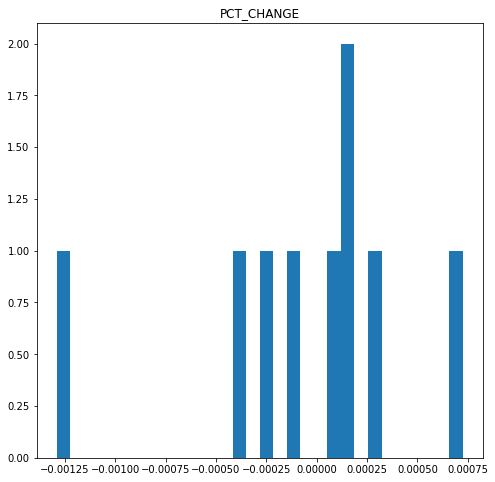

In [65]:
plt.figure(figsize=(8,8))
plt.title('PCT_CHANGE')
plt.hist(stat["pct_change"], bins=30)
plt.show()

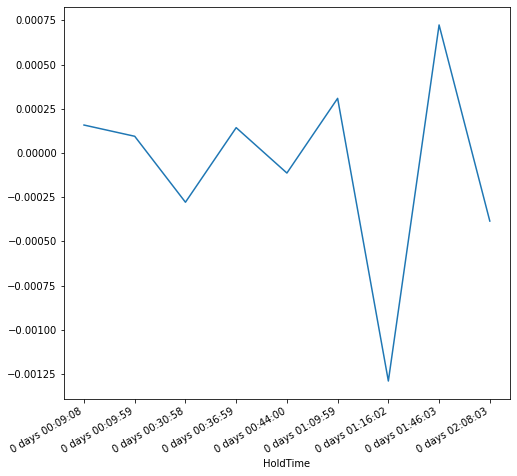

In [66]:
stat["HoldTime"] = stat["CloseTime"] - stat["TimeOpen"]
fig = plt.figure(figsize=(8, 8))
ax = plt.subplot(111)
stat.groupby(by='HoldTime')["pct_change"].mean().plot(ax=ax)
plt.show()

In [70]:
stat["Profit"] = stat.apply(lambda x: x['openPrice'] - x['closePrice'] if x['typeOperation'] == 'SELL' else x['closePrice'] - x['openPrice'], axis=1)
stat["Profit"] = stat.apply(lambda x: x["Profit"] * (100_000 / x["openPrice"]), axis=1)
stat

,TimeOpen,typeOperation,position,openPrice,openTime,stopLossBorder,halfTime,varianceRatioOpen,typeHolding,closePrice,CloseTime,pct_change,HoldTime,Profit
0,2022-04-27 17:17:01,SELL,-100000,132.533,3379.794916,134.305,64,0.959694,lightCrossEmergent,132.520453,2022-04-27 17:27:00,0.000095,0 days 00:09:59,9.466982
1,2022-04-27 17:29:00,SELL,-100000,132.547,4099.151981,134.898,62,0.724988,endPeriod,132.451000,2022-04-27 19:15:03,0.000724,0 days 01:46:03,72.427139
2,2022-04-27 19:16:01,BUY,100000,132.482,10520.365503,130.764,69,0.635254,lightCrossEmergent,132.467000,2022-04-27 20:00:01,-0.000113,0 days 00:44:00,-11.322293
3,2022-04-27 20:01:00,SELL,-100000,132.491,13219.250641,134.858,68,0.887036,endPeriod,132.542000,2022-04-27 22:09:03,-0.000385,0 days 02:08:03,-38.493181
4,2022-04-27 22:10:04,BUY,100000,132.604,20963.066014,129.047,59,0.569360,lightCrossEmergent,132.567093,2022-04-27 22:41:02,-0.000278,0 days 00:30:58,-27.832328
5,2022-04-27 22:54:01,SELL,-100000,132.600,23600.394377,136.664,57,0.810026,endPeriod,132.559000,2022-04-28 00:04:00,0.000309,0 days 01:09:59,30.920060
6,2022-04-28 00:05:00,BUY,100000,132.580,27859.641084,130.344,55,0.826697,lightCrossEmergent,132.600982,2022-04-28 00:14:08,0.000158,0 days 00:09:08,15.825779
7,2022-04-28 00:30:00,SELL,-100000,132.614,29359.531224,134.784,58,0.834429,endPeriod,132.785000,2022-04-28 01:46:02,-0.001289,0 days 01:16:02,-128.945662
8,2022-04-28 02:33:01,BUY,100000,132.784,36740.409042,128.842,95,0.973729,lightCrossEmergent,132.803047,2022-04-28 03:10:00,0.000143,0 days 00:36:59,14.344626


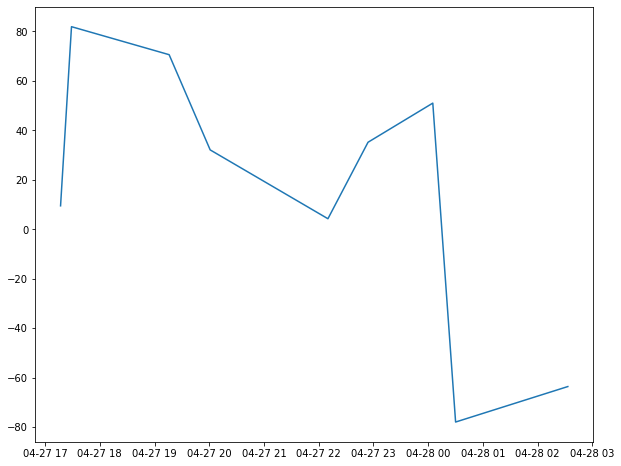

In [73]:
plt.figure(figsize=(10, 8))
plt.plot(stat["TimeOpen"], stat["Profit"].cumsum())
plt.show()

In [77]:
stat.sort_values(by="Profit", ascending=False).head()

,TimeOpen,typeOperation,position,openPrice,openTime,stopLossBorder,halfTime,varianceRatioOpen,typeHolding,closePrice,CloseTime,pct_change,HoldTime,Profit
1,2022-04-27 17:29:00,SELL,-100000,132.547,4099.151981,134.898,62,0.724988,endPeriod,132.451000,2022-04-27 19:15:03,0.000724,0 days 01:46:03,72.427139
5,2022-04-27 22:54:01,SELL,-100000,132.600,23600.394377,136.664,57,0.810026,endPeriod,132.559000,2022-04-28 00:04:00,0.000309,0 days 01:09:59,30.920060
6,2022-04-28 00:05:00,BUY,100000,132.580,27859.641084,130.344,55,0.826697,lightCrossEmergent,132.600982,2022-04-28 00:14:08,0.000158,0 days 00:09:08,15.825779
8,2022-04-28 02:33:01,BUY,100000,132.784,36740.409042,128.842,95,0.973729,lightCrossEmergent,132.803047,2022-04-28 03:10:00,0.000143,0 days 00:36:59,14.344626
0,2022-04-27 17:17:01,SELL,-100000,132.533,3379.794916,134.305,64,0.959694,lightCrossEmergent,132.520453,2022-04-27 17:27:00,0.000095,0 days 00:09:59,9.466982


In [78]:
stat.sort_values(by="Profit", ascending=True).head()

,TimeOpen,typeOperation,position,openPrice,openTime,stopLossBorder,halfTime,varianceRatioOpen,typeHolding,closePrice,CloseTime,pct_change,HoldTime,Profit
7,2022-04-28 00:30:00,SELL,-100000,132.614,29359.531224,134.784,58,0.834429,endPeriod,132.785000,2022-04-28 01:46:02,-0.001289,0 days 01:16:02,-128.945662
3,2022-04-27 20:01:00,SELL,-100000,132.491,13219.250641,134.858,68,0.887036,endPeriod,132.542000,2022-04-27 22:09:03,-0.000385,0 days 02:08:03,-38.493181
4,2022-04-27 22:10:04,BUY,100000,132.604,20963.066014,129.047,59,0.569360,lightCrossEmergent,132.567093,2022-04-27 22:41:02,-0.000278,0 days 00:30:58,-27.832328
2,2022-04-27 19:16:01,BUY,100000,132.482,10520.365503,130.764,69,0.635254,lightCrossEmergent,132.467000,2022-04-27 20:00:01,-0.000113,0 days 00:44:00,-11.322293
0,2022-04-27 17:17:01,SELL,-100000,132.533,3379.794916,134.305,64,0.959694,lightCrossEmergent,132.520453,2022-04-27 17:27:00,0.000095,0 days 00:09:59,9.466982
